In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


This is a calorie regression problem. Given a number of variables including sex, age weight heart rate and body temp I need to predict Calories

I will do some preprocessing in the form of standard scalar. And I will use PCA to do some EDA to determine which variables are most important

My EDA which plots histograms of calories indicate that I am dealing with a heavily skewed distribution 


my conclusion is that 
after doing some hyper parameter optimization the conclusion I can reach is that the best max_depth is 8. 

Perhaps I should try different dimensionality reduction techniquees

In [54]:
train = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")

print(train)

            id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
0          150.0  
1

In [55]:
y = train['Calories']
x = train.drop(['Calories','id'],axis=1)

In [56]:
print(x.columns)

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')


USe PCA and Standard scalar. 

show histograms showing min max and distribution of the data

predict calories with adaboost and random forest. 



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])
#x = StandardScaler().fit_transform(x)

transformer = StandardScaler().fit(x)
X = transformer.transform(x)
y = pd.DataFrame(y)
y = StandardScaler().fit_transform(np.array(y))
pcar = PCA(n_components=5).fit(x)
X = pcar.transform(X)
X_train, X_val, Y_train, Y_val = train_test_split(X,y,test_size=0.2)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [59]:



# Apply PCA
pca = PCA(n_components=x.shape[1])
pca.fit(x)

# Get the absolute value of components for the first principal component
importance_scores = np.abs(pca.components_[0])

 

In [73]:
# Create a DataFrame for easier interpretation
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10)) 

      Feature  Importance
3      Weight    0.735658
2      Height    0.668599
1         Age    0.105103
0         Sex    0.021075
4    Duration    0.015067
5  Heart_Rate    0.007916
6   Body_Temp    0.001470


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


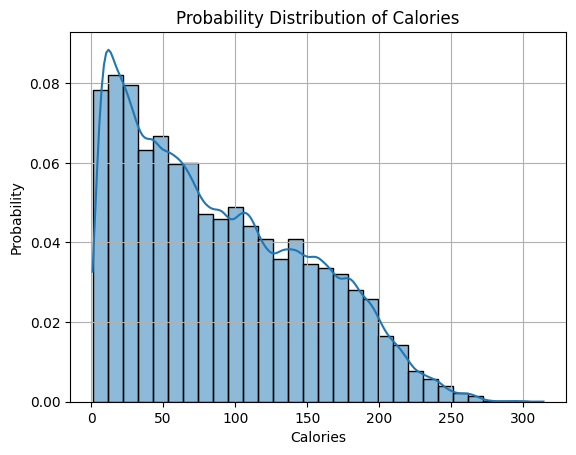

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['Calories'], kde=True, stat="probability", bins=30)
plt.title('Probability Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Log-Scaled Probability Distribution of Calories')

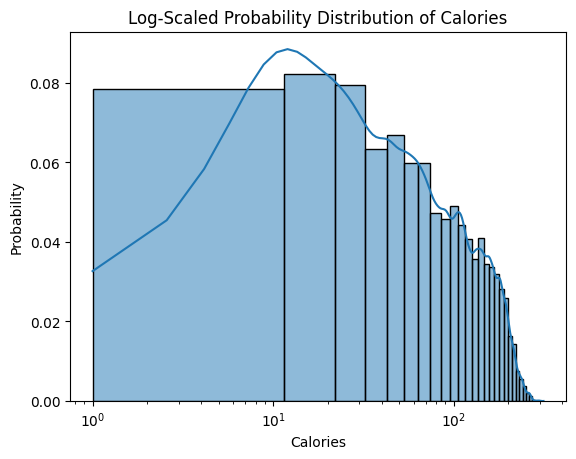

In [61]:
sns.histplot(train['Calories'], kde=True, stat="probability", bins=30)
plt.xscale('log')
plt.title('Log-Scaled Probability Distribution of Calories')


In [69]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(X_train,Y_train)

/tmp/ipykernel_31/361045990.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,Y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
regressor = RandomForestRegressor(n_estimators=10, random_state=42)

# Hyperparameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8]
}

# Grid search with 5-fold cross-validation
search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8]},
             scoring='neg_mean_squared_error')

In [66]:
test = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")

test = test.drop(['id'],axis=1)

test['Sex'] = le.fit_transform(test['Sex'])

test = transformer.transform(test)

test = pcar.transform(test)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


[-0.96614287  0.2775404  -0.01575089 ... -0.25615358  1.31447735
 -0.18243009]


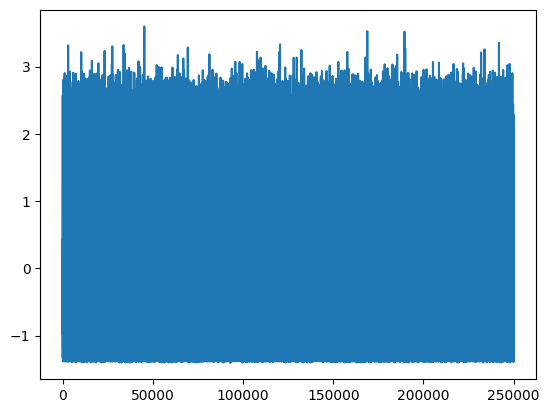

In [70]:
preds = regressor.predict(test)

print(preds)

plt.plot(preds)

In [72]:
print(preds.shape)

(250000,)


In [71]:
from sklearn.metrics import mean_squared_error
best_regressor = search.best_estimator_
y_pred = best_regressor.predict(X_val)
mse = mean_squared_error(Y_val, y_pred)
print("MSE:", mse)

MSE: 0.011980596120582535


In [ ]:
print(best_regressor)